In [1]:
import sys
sys.path.insert(0, "/home/pidoux/MASTER/ML/projet/Projet/Module")

from Loss import *
from Linear import *
from Activation import *
from Sequential import *
from mltools import *

import matplotlib.pyplot as plt
import random
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist

def onehot(x):
    out = [0] * 10
    out[x] = 1
    return out


2023-05-03 16:16:30.186592: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-03 16:16:30.842921: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-03 16:16:30.847072: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-03 16:16:33.535403: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [68]:
# importer les données de Keras

from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
#vectoriser l'image et normaliser
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# selectionner un sous ensemble
X_train = X_train[:1000]
y_train = y_train[:1000]
X_test = X_test[:100]
y_test = y_test[:100]
y_train = np.asarray([onehot(y) for y in y_train])

# paramétrer le modèle
d = X_train.shape[1]
print(d)
d_prime = 196
d_prime2 = 100
out = 784
epoch = 10000
gradient_step = 1e-5
batchsize = 100
lin = Linear(d, d_prime)
lin2 = Linear(d_prime, d_prime2)
lin3 = Linear(d_prime2, d_prime)
lin4 = Linear(d_prime, out)
lin3._parameters = lin2._parameters.T
lin4._parameters = lin._parameters.T
tan = TanH()
sig = Sigmoide()
loss = MSELoss()

Encodeur = [lin,tan,lin2,tan]
Decodeur = [lin3,tan,lin4,sig]

net = Sequential(Encodeur + Decodeur)

opt = Optim(net,loss,gradient_step)
L = opt.SGD(X_train,X_train,batchsize,epoch)

784


100%|██████████| 10000/10000 [46:06<00:00,  3.61it/s] 


4.531174378004368


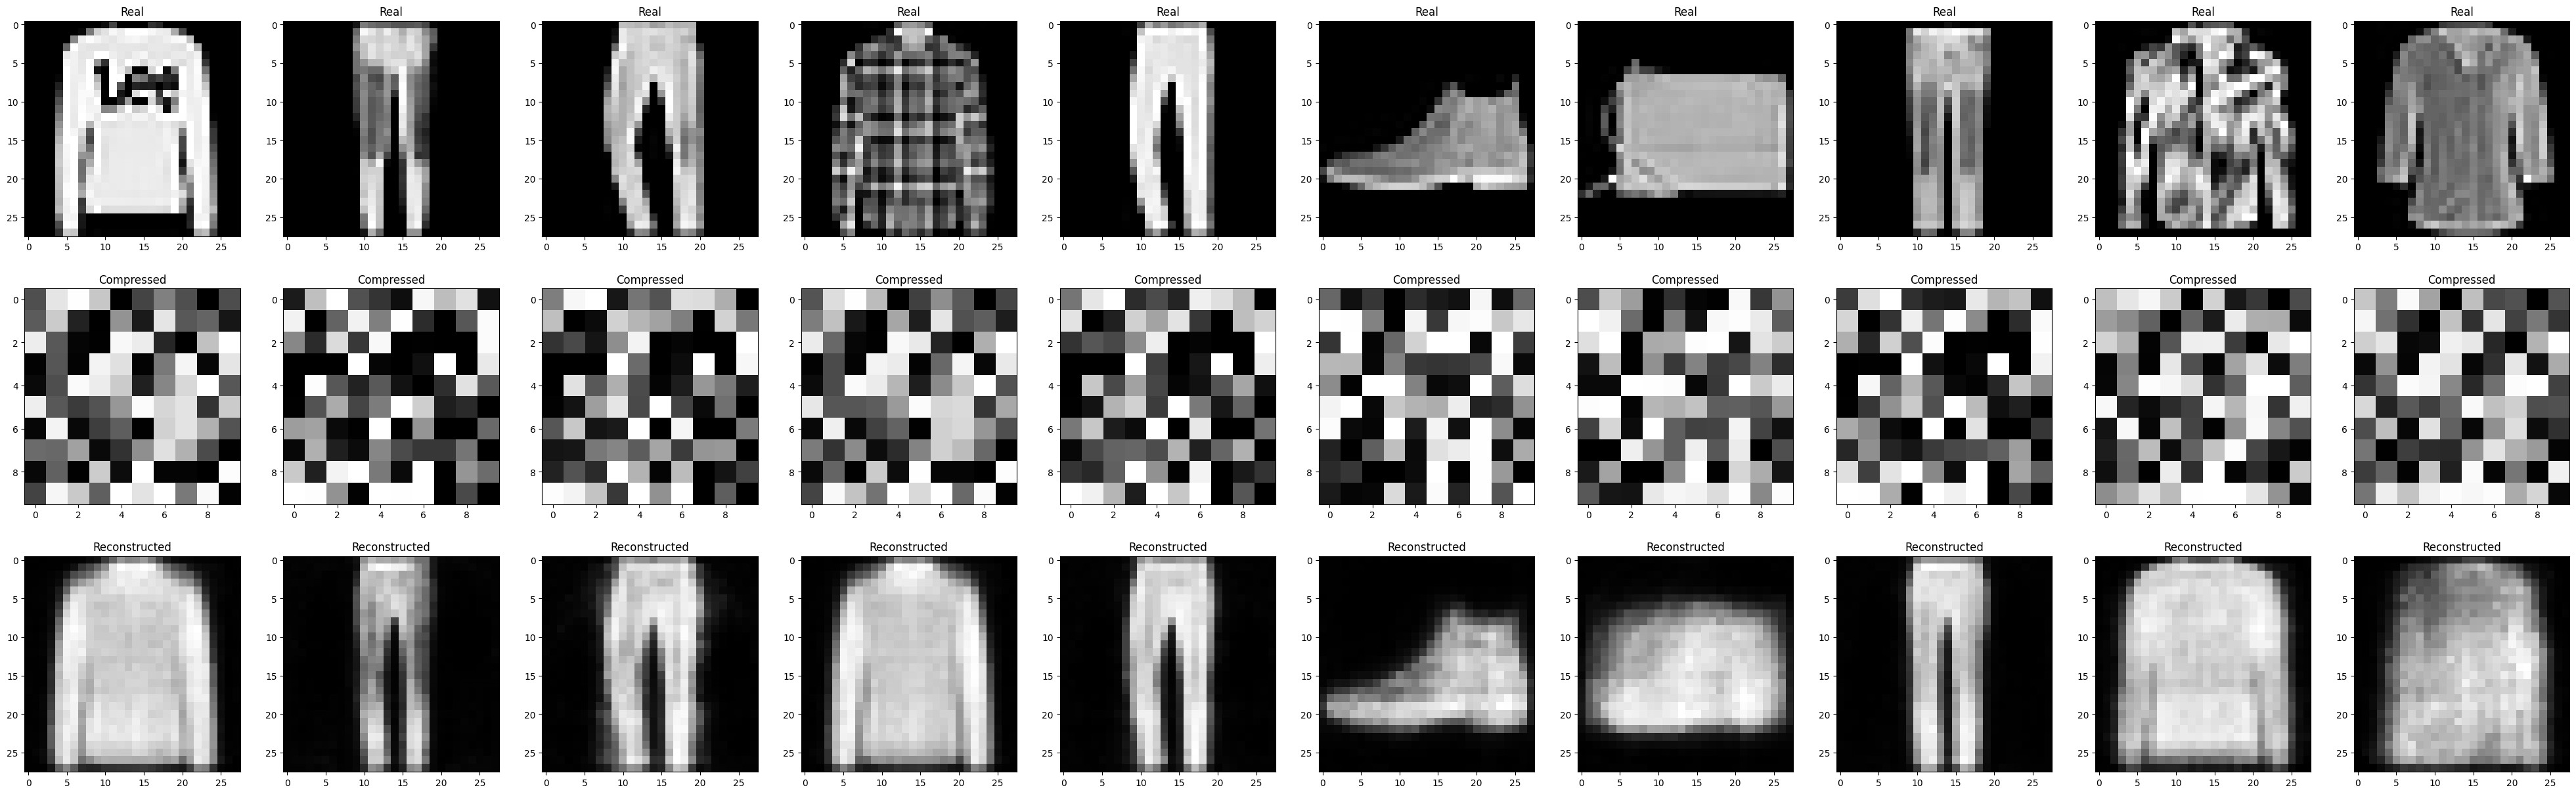

In [70]:
draw_construction(X_test,opt._net,n_comp=10)
reconstructed = opt._net.forward(X_test)[-1]
n=0
for i in range(len(X_test)):
    n+=np.linalg.norm(X_test[i]-reconstructed[i])
n/=len(X_test)
print(n)


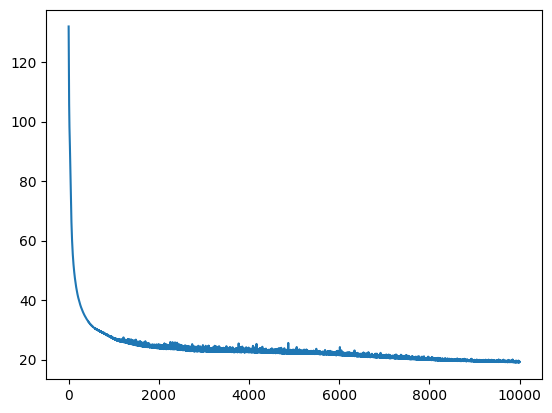

In [69]:
plt.plot(L)

In [59]:
16*16


256

In [60]:
14*14

196

In [16]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
#vectoriser l'image et normaliser
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# selectionner un sous ensemble
X_train = X_train[:2000]
y_train = y_train[:2000]
X_test = X_test[:1000]
y_test = y_test[:1000]
y_train2 = y_train
y_train = np.asarray([onehot(y) for y in y_train])


# paramétrer le modèle
d = X_train.shape[1]
print(d)
d_prime = 100
d_prime2 = 16
out = 784
epoch = 2000
gradient_step = 0.00001
batchsize = 500
lin = Linear(d, d_prime)
lin2 = Linear(d_prime, d_prime2)
lin3 = Linear(d_prime2, d_prime)
lin4 = Linear(d_prime, out)
lin3._parameters = lin2._parameters.T
lin4._parameters = lin._parameters.T
tan = TanH()
sig = Sigmoide()
loss = BCELoss()

Encodeur = [lin,tan,lin2,tan]
Decodeur = [lin3,tan,lin4,sig]

net = Sequential(Encodeur + Decodeur)

opt = Optim(net,loss,gradient_step)
L = opt.SGD(X_train,X_train,batchsize,epoch)

784


100%|██████████| 2000/2000 [20:38<00:00,  1.62it/s]


5.2682263832171605
1.4586205679213402


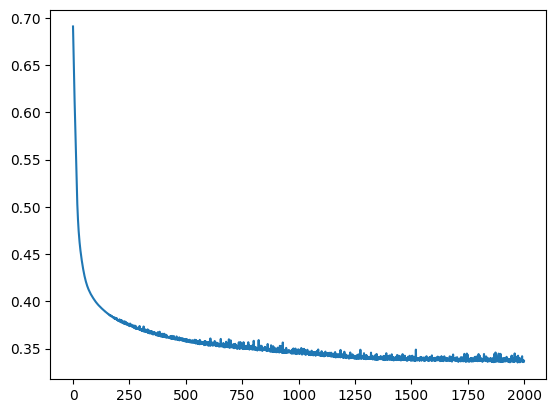

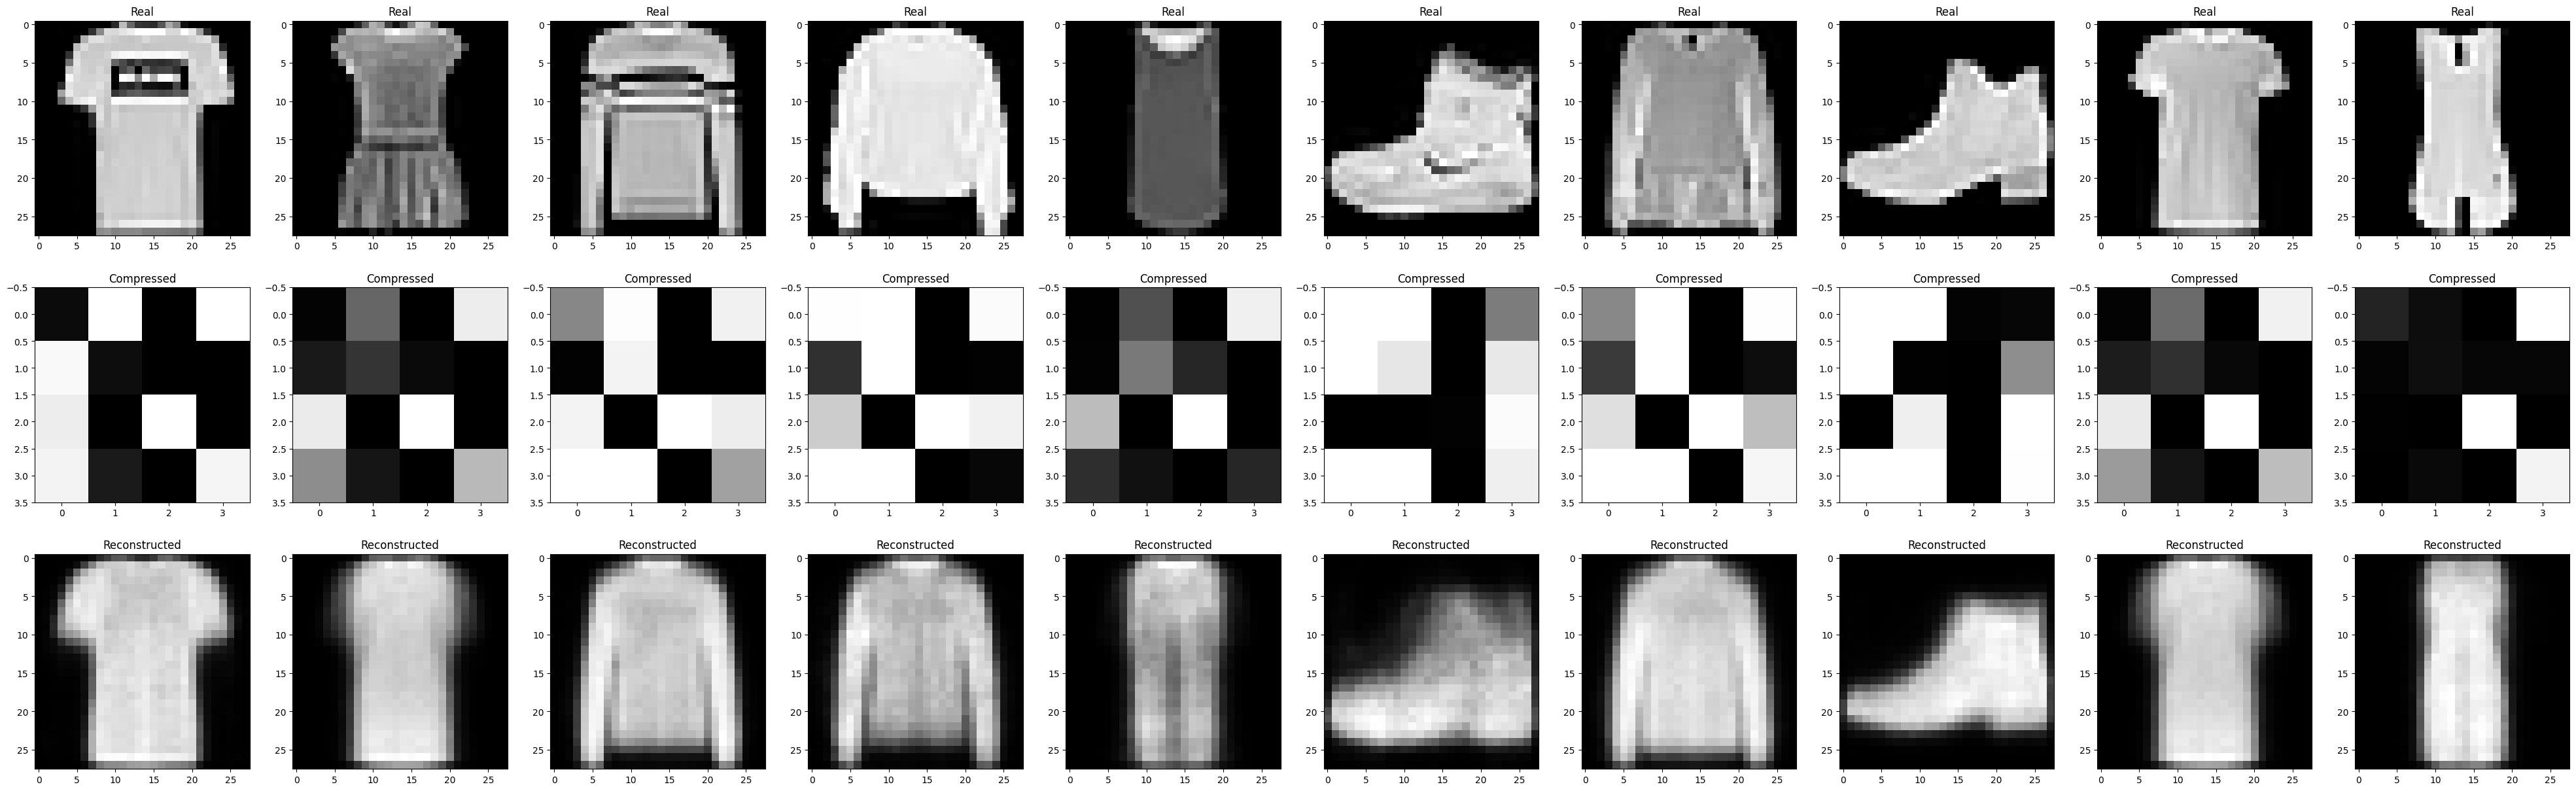

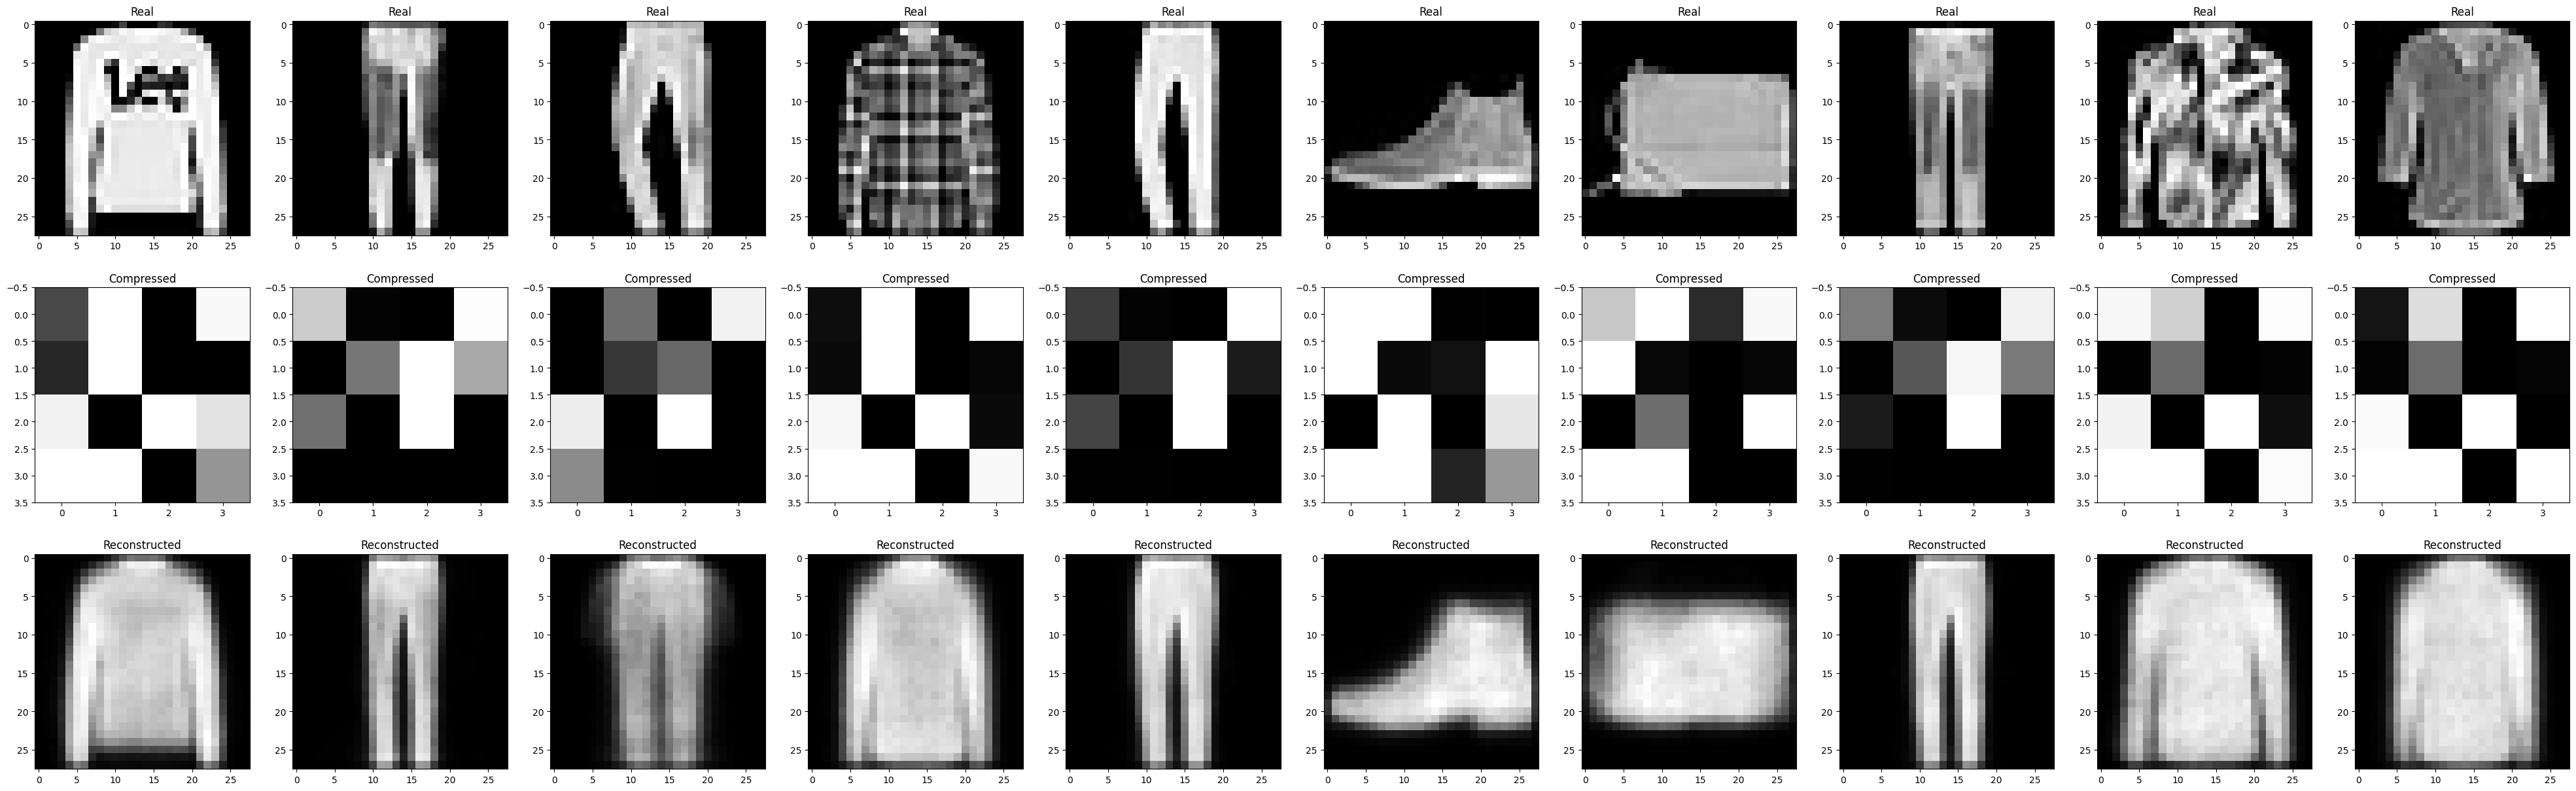

In [18]:
compressed_train = opt._net.forward(X_train)[3]
reconstructed_train = opt._net.forward(X_train)[7]
compressed_test = opt._net.forward(X_test)[3]
reconstructed_test = opt._net.forward(X_test)[7]

plt.plot(L)

draw_construction(X_train,opt._net,n_comp=4)
draw_construction(X_test,opt._net,n_comp=4)

liste=[]
for i in range(len(X_test)):
    liste.append(np.linalg.norm(X_test[i]-reconstructed_test[i]))
print(np.mean(liste))
print(np.std(liste))